In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gensim import corpora, models, similarities

In [3]:
# Original data, where each row is a document and each column represents
# a characteristic of the documents. 
data = [[1, 1, 1, 0, 0], 
        [2, 2, 2, 0, 0], 
        [1, 1, 1, 0, 0],
        [5, 5, 5, 0, 0],
        [0, 0, 0, 2, 2],
        [0, 0, 0, 3, 3],
        [0, 0, 0, 1, 1]]

In [4]:
print ("Results from plain SVD --------------------------------")

Results from plain SVD --------------------------------


In [5]:
# Apply SVD to the original data.
data_array = np.array(data)
u, s, v = np.linalg.svd(data, full_matrices=False)

In [9]:
# Each column in U is a singular vector, where the values
# reflect how much each document contributes to the representation
# of that topic. Each of the vectors corresponds to a topic.
print("U: ", u)

U:  [[-1.79605302e-01  0.00000000e+00  9.65125963e-01 -6.54812483e-17
   1.90456850e-01]
 [-3.59210604e-01  0.00000000e+00  9.37361795e-02 -4.47213595e-01
  -8.13745212e-01]
 [-1.79605302e-01  0.00000000e+00  4.68680897e-02  8.94427191e-01
  -4.06872606e-01]
 [-8.98026510e-01  0.00000000e+00 -2.39893282e-01 -3.18937782e-16
   3.68781236e-01]
 [ 0.00000000e+00 -5.34522484e-01  0.00000000e+00 -7.66553128e-18
   0.00000000e+00]
 [ 0.00000000e+00 -8.01783726e-01  0.00000000e+00  4.40128543e-17
   0.00000000e+00]
 [ 0.00000000e+00 -2.67261242e-01  0.00000000e+00 -3.83276564e-18
   0.00000000e+00]]


In [10]:
# Each value along the diagonal represents the weight of the topic
# in the decomposition of the original data.
S = np.diag(s)
print ("S: ", S)

S:  [[9.64365076e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 5.29150262e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.27710981e-16 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.76865947e-17
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.41059970e-33]]


In [13]:
# Each row in V is a singular vector, where the values reflect how
# much each characteristic contributes to the representation of the
# topic. Each of the row vectors corresponds to a topic.
print ("V: ", v)

V:  [[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [-0.         -0.         -0.         -0.70710678 -0.70710678]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]
 [ 0.          0.          0.         -0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]]


In [15]:
print ("Results from LSA -------------------------------------")

Results from LSA -------------------------------------


In [16]:
# Written as text to make it more apparent how the components work with each other.
data_text = [['data', 'inf', 'retrieval'],
             ['data']*2 + ['inf']*2 + ['retrieval']*2,
             ['data', 'inf', 'retrieval'],
             ['data']*5 + ['inf']*5+['retrieval']*5,
             ['brain']*2 + ['lung']*2,
             ['brain']*3 + ['lung']*3,
             ['brain', 'lung']]

In [17]:
data_text

[['data', 'inf', 'retrieval'],
 ['data', 'data', 'inf', 'inf', 'retrieval', 'retrieval'],
 ['data', 'inf', 'retrieval'],
 ['data',
  'data',
  'data',
  'data',
  'data',
  'inf',
  'inf',
  'inf',
  'inf',
  'inf',
  'retrieval',
  'retrieval',
  'retrieval',
  'retrieval',
  'retrieval'],
 ['brain', 'brain', 'lung', 'lung'],
 ['brain', 'brain', 'brain', 'lung', 'lung', 'lung'],
 ['brain', 'lung']]

In [85]:
dictionary = corpora.Dictionary(data_text)
print (len(dictionary))

5


In [84]:
for i in range(len(dictionary)):
    print (i, dictionary[i])

0 data
1 inf
2 retrieval
3 brain
4 lung


In [108]:
dictionary.doc2bow(data_text[0])

[(0, 1), (1, 1), (2, 1)]

In [87]:
# Compute bag of words representation of the text data, which yields numbers
# corresponding to the original data.
corpus = [dictionary.doc2bow(text) for text in data_text]

In [23]:
#corpora.MmCorpus.serialize('/tmp/corpus.mm', corpus) 
#corpus = corpora.MmCorpus('/tmp/corpus.mm', 
print ("Corpus: ")
for entry in corpus:
  print(entry)

Corpus: 
[(0, 1), (1, 1), (2, 1)]
[(0, 2), (1, 2), (2, 2)]
[(0, 1), (1, 1), (2, 1)]
[(0, 5), (1, 5), (2, 5)]
[(3, 2), (4, 2)]
[(3, 3), (4, 3)]
[(3, 1), (4, 1)]


In [117]:
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
corpus_lsi = lsi_model[corpus]
print ("Topics: ")
for topic in lsi_model.print_topics(2):
  print(topic)

Topics: 
(0, '0.577*"data" + 0.577*"retrieval" + 0.577*"inf" + -0.000*"lung" + -0.000*"brain"')
(1, '0.707*"brain" + 0.707*"lung" + -0.000*"inf" + 0.000*"data" + 0.000*"retrieval"')


In [118]:
# TODO: this should be the left singular vectors, but is instead the right singular vectors. Why?

print ("U:")
s = lsi_model.projection.s
u = np.zeros((7, 2))

U:


In [119]:
i = 0
for doc in corpus_lsi:
  u[i][doc[0][0]] = doc[0][1]/s[doc[0][0]]
  i += 1
print (u)

[[0.1796053  0.        ]
 [0.3592106  0.        ]
 [0.1796053  0.        ]
 [0.89802651 0.        ]
 [0.         0.53452248]
 [0.         0.80178373]
 [0.         0.26726124]]


In [120]:
print ("S:")
S = np.diag(s)
print (S)

S:
[[9.64365076 0.        ]
 [0.         5.29150262]]


In [121]:
print ("V:")
V = np.round(np.transpose(np.array(lsi_model.projection.u)), 4)
print (V)

V:
[[ 0.5774  0.5774  0.5774 -0.     -0.    ]
 [ 0.     -0.      0.      0.7071  0.7071]]


In [122]:
print ("Corpus transformed wrt topics from LSI (u*weight): ")
for doc in corpus_lsi:
  print(doc)

Corpus transformed wrt topics from LSI (u*weight): 
[(0, 1.7320508075688776)]
[(0, 3.4641016151377553)]
[(0, 1.7320508075688776)]
[(0, 8.660254037844387)]
[(1, 2.82842712474619)]
[(1, 4.242640687119284)]
[(1, 1.414213562373095)]


[[1.7322 0.    ]
 [3.4644 0.    ]
 [1.7322 0.    ]
 [8.661  0.    ]
 [0.     2.8284]
 [0.     4.2426]
 [0.     1.4142]]


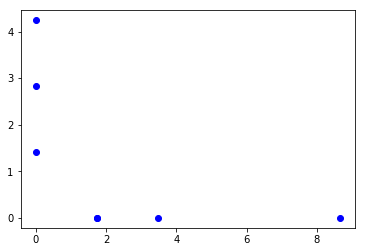

[[5.56776436 0.        ]
 [5.56776436 0.        ]
 [5.56776436 0.        ]
 [0.         3.74165739]
 [0.         3.74165739]]


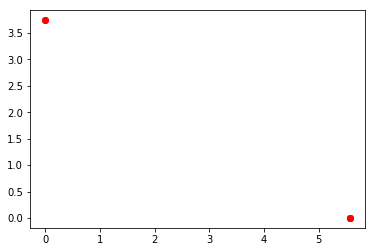

In [123]:
# Visualization of the term and document representations in the latent space.
# Document representations in latent space.
#latent_docs = []
#for doc_row in data_array:
#  latent_doc = np.dot(doc_row, np.transpose(V))
#  latent_docs.append(latent_doc)

#print latent_docs
latent_docs = np.dot(data_array, np.transpose(V))
print (latent_docs)
plt.plot([x[0] for x in latent_docs], [x[1] for x in latent_docs], 'bo')
plt.show()
plt.clf()

# Term representation in latent space.
latent_terms = np.dot(np.transpose(data_array), u)
print (latent_terms)
plt.plot([x[0] for x in latent_terms], [x[1] for x in latent_terms], 'ro')
plt.show()